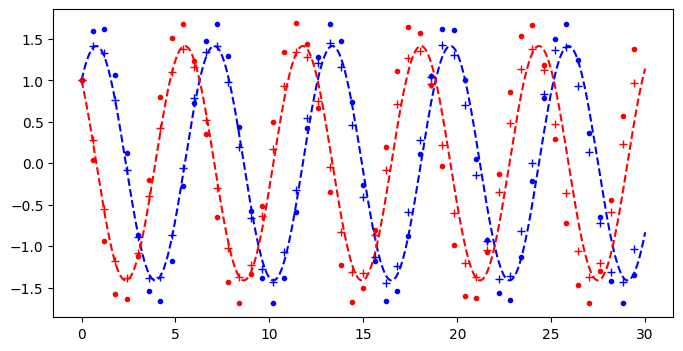

In [53]:
import numpy as np
from matplotlib import pyplot as plt

k=1
m=1
x0=float(input("initial position: "))
v0=float(input("initial velocity: "))
te=float(input("end time: "))
step=float(input("step: "))

def euler_spring(x0:float,v0:float,te: float, step:float,k:float=1, m:float=1):
    # use Euler's method to solve the Newtonian equation of motion of mass m attached to a string
    t=[]
    tm=0
    while tm<te:
        t.append(tm)
        tm+=step
    x=[x0]
    v=[v0]
    for i in t[1:]:
        x.append(x[-1]+v[-1]*step)
        v.append(v[-1]-k/m*x[-1]*step)

    return x,v,t

x,v,t=euler_spring(x0,v0,te,step,k,m)
omega=np.sqrt(k/m)

texact=[0]
ti=0
while ti<te:
    ti+=te/1000
    texact.append(ti)

xexact=[x0*np.cos(omega*i)+v0/omega*np.sin(omega*i) for i in texact]
vexact=[-omega*x0*np.sin(omega*i)+v0*np.cos(omega*i) for i in texact]

fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.plot(t,x,'o',color='blue',markersize=3)
ax.plot(t,v,'o',color='red',markersize=3)
ax.plot(texact,xexact,'--',color='blue')
ax.plot(texact,vexact,'--',color='red')

def predictor_corrector_spring(x0:float,v0:float,te:float, step:float,k:float=1,m:float=1):
    t=[]
    tm=0
    while tm<te:
        t.append(tm)
        tm+=step
    x=[x0]
    v=[v0]
    for i in t[1:]:
        xnew=x[-1]+v[-1]*step
        vnew=v[-1]-k/m*x[-1]*step
        xnew=x[-1]+(v[-1]+vnew)/2*step
        vnew=v[-1]-k/m*(x[-1]+xnew)/2*step
        x.append(xnew)
        v.append(vnew)
        
    return x,v,t

x,v,t=predictor_corrector_spring(x0,v0,te,step,k,m)
ax.plot(t,x,'+',color='blue')
ax.plot(t,v,'+',color='red')

Intersection point with takeoff angle 45°: 267.54135812636144
Intersection point with takeoff angle 40°: 269.57733469303275
Intersection point with takeoff angle 42.5°: 269.36983294375403


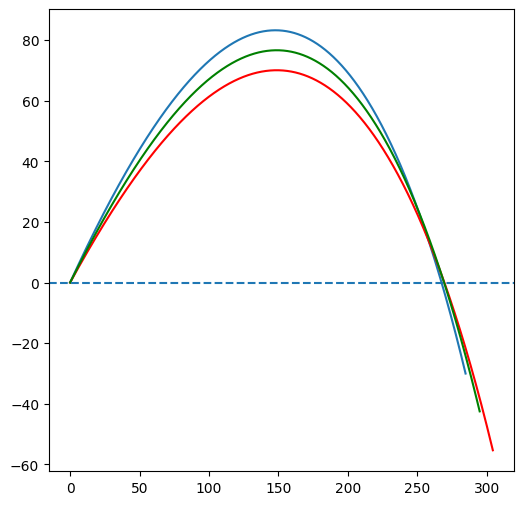

In [3]:
def corrector_motorbike(x0:float,y0:float,vx0:float,vy0:float,te:float,step:float,g:float=9.8,mass:float=250,area:float=0.93,density:float=1.2):
    # Tao Pang, section 4.3
    k=area*density/2   
    t=[]
    tm=0
    while tm<te:
        t.append(tm)
        tm+=step
    n=len(t)
    x=[0 for i in range(n)]
    y=x.copy()
    vx=x.copy()
    vy=x.copy()
    v0=np.sqrt(vx0**2+vy0**2)
    ax0=-k*v0/mass*vx0
    ay0=-g-k*v0/mass*vy0
    
    x[0]=x0
    y[0]=y0
    vx[0]=vx0
    vy[0]=vy0
    x[1]=x0+step*vx0+step**2/2*ax0
    y[1]=y0+step*vy0+step**2/2*ay0
    vx[1]=vx0+step*ax0+step**2/2*(0-k/mass*(v0*ax0+(vx0*ax0+vy0*ay0)/v0*vx0))
    vy[1]=vy0+step*ay0+step**2/2*(0-k/mass*(v0*ay0+(vx0*ax0+vy0*ay0)/v0*vy0))
    
    for i in range(2,n):
        x[i]=x[i-2]+2*step*vx[i-1]
        y[i]=y[i-2]+2*step*vy[i-1]
        
        vx[i]=vx[i-2]+2*step*a(vx[i-1],vy[i-1],k)[0]
        vy[i]=vy[i-2]+2*step*a(vx[i-1],vy[i-1],k)[1]
        
        x[i]=x[i-2]+step/3*(vx[i]+4*vx[i-1]+vx[i-2])
        y[i]=y[i-2]+step/3*(vy[i]+4*vy[i-1]+vy[i-2])
        
        vx[i]=vx[i-2]+step/3*(a(vx[i-2],vy[i-2],k,g,mass)[0]+4*a(vx[i-1],vy[i-1],k,g,mass)[0]+a(vx[i],vy[i],k,g,mass)[0])
        vy[i]=vy[i-2]+step/3*(a(vx[i-2],vy[i-2],k,g,mass)[1]+4*a(vx[i-1],vy[i-1],k,g,mass)[1]+a(vx[i],vy[i],k,g,mass)[1])
    
    return x,y,vx,vy,t
                
def a(vx:float,vy:float,k:float,g:float=9.8,mass:float=250):
    ax=-k*np.sqrt(vx**2+vy**2)/mass*vx
    ay=-g-k*np.sqrt(vx**2+vy**2)/mass*vy
    return [ax,ay]

x,y,vx,vy,t=corrector_motorbike(0,0,67/np.sqrt(2),67/np.sqrt(2),9,0.001)
xl,yl,vxl,vyl,th=corrector_motorbike(0,0,67*np.cos(40*np.pi/180),67*np.sin(40*np.pi/180),9,0.001)
xm,ym,vxm,vym,tm=corrector_motorbike(0,0,67*np.cos(42.5*np.pi/180),67*np.sin(42.5*np.pi/180),9,0.001)


fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.plot(x,y)
ax.plot(xl,yl,color='red')
ax.plot(xm,ym,color='green')
plt.axhline(y=0, linestyle='dashed')

minalt=100
minx=0

for i in range(1,len(x)):
    if abs(y[i])<minalt and i >= len(x)/2:
        minalt=abs(y[i])
        minx=x[i]
        
print("Intersection point with takeoff angle 45°:", minx)

minalt=100
minx=0

for i in range(1,len(xl)):
    if abs(yl[i])<minalt and i >= len(xl)/2:
        minalt=abs(yl[i])
        minx=xl[i]
             
print("Intersection point with takeoff angle 40°:", minx)

minalt=100
minx=0

for i in range(1,len(xm)):
    if abs(ym[i])<minalt and i >= len(xm)/2:
        minalt=abs(ym[i])
        minx=xm[i]
             
print("Intersection point with takeoff angle 42.5°:", minx)


Intersection point with takeoff angle 36.0°: 266.52105974126624
8.037000000000985


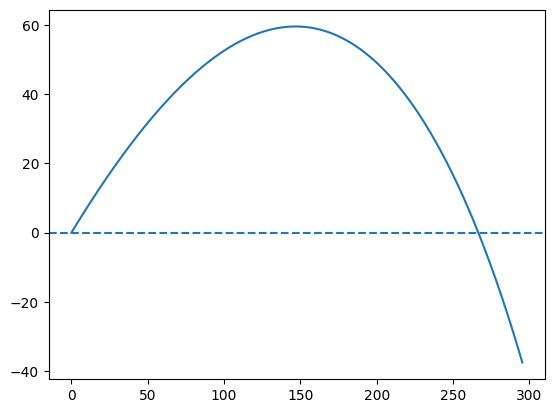

In [36]:
angle=float(input("take off angle: "))
x,y,vx,vy,t=corrector_motorbike(0,0,67*np.cos(angle*np.pi/180),67*np.sin(angle*np.pi/180),2*67*np.sin(angle*np.pi/180)/9.8,0.001)

minalt=100
minx=0

for i in range(1,len(x)):
    if abs(y[i])<minalt and i >= len(x)/2:
        minalt=abs(y[i])
        minx=x[i]
        
fig, ax = plt.subplots(1, 1)
ax.plot(x,y)
plt.axhline(y=0, linestyle='dashed')
        
print("Intersection point with takeoff angle "+str(angle)+"°:", minx)
print(t[-1])

(0.0, 5.0)

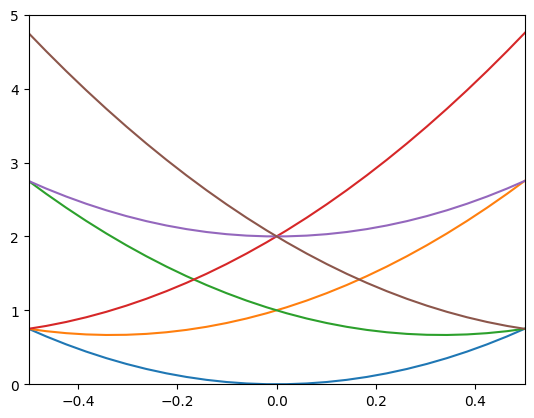

In [12]:
fig, ax = plt.subplots(1, 1)
x=np.linspace(-2,2,100)
ax.plot(x,3*x**2)
ax.plot(x,(x+1)**2+2*x**2)
ax.plot(x,(x-1)**2+2*x**2)
ax.plot(x,2*(x+1)**2+x**2)
ax.plot(x,(x-1)**2+(x+1)**2+x**2)
ax.plot(x,2*(x-1)**2+x**2)
plt.xlim([-0.5,0.5])
plt.ylim([0,5])

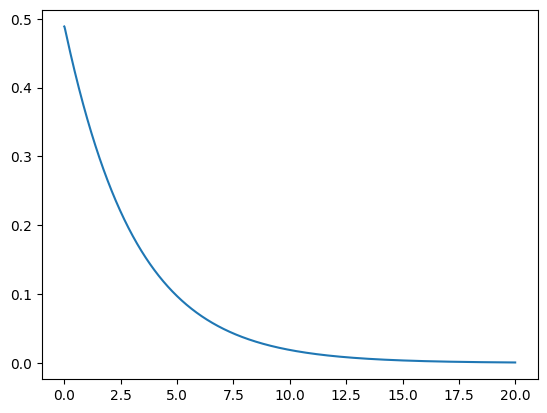

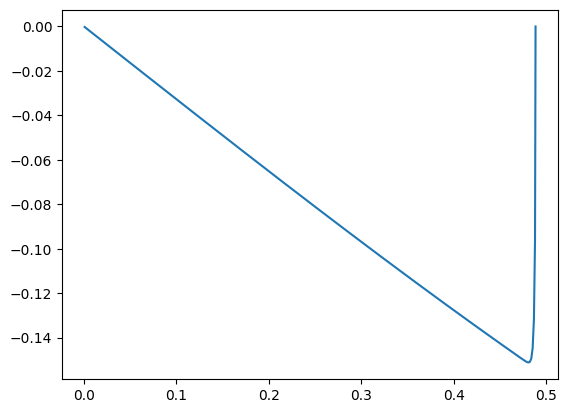

In [50]:
def rk4_pendulum(theta0:float,eta:float,L:float,te:float,step:float):
    g=9.8
    
    t=[]
    tm=0
    while tm<te:
        t.append(tm)
        tm+=step
    
    n=len(t)
    theta=[0 for i in range(n)]  
    omega=theta.copy()
    
    theta[0]=theta0*np.pi/180
    omega[0]=0
    for i in range(0,n-1):
        c1_theta=step*omega[i]
        c1_omega=step*(-g/L*np.sin(theta[i])-eta*omega[i])
        c2_theta=step*(omega[i]+c1_omega/2)
        c2_omega=step*(-g/L*np.sin(theta[i]+c1_theta/2)-eta*(omega[i]+c1_omega/2))
        c3_theta=step*(omega[i]+c2_omega/2)
        c3_omega=step*(-g/L*np.sin(theta[i]+c2_theta/2)-eta*(omega[i]+c2_omega/2))
        c4_theta=step*(omega[i]+c3_omega)
        c4_omega=step*(-g/L*np.sin(theta[i]+c3_theta)-eta*(omega[i]+c3_omega))
        
        theta[i+1]=theta[i]+1/6*(c1_theta+2*c2_theta+2*c3_theta+c4_theta)
        omega[i+1]=omega[i]+1/6*(c1_omega+2*c2_omega+2*c3_omega+c4_omega)
    
    return theta,omega,t

theta,omega,t=rk4_pendulum(28,100,0.3,20,0.01)
fig, ax = plt.subplots(1, 1)
ax.plot(t,theta)
fig, ax2 = plt.subplots(1, 1)
ax2.plot(theta,omega)

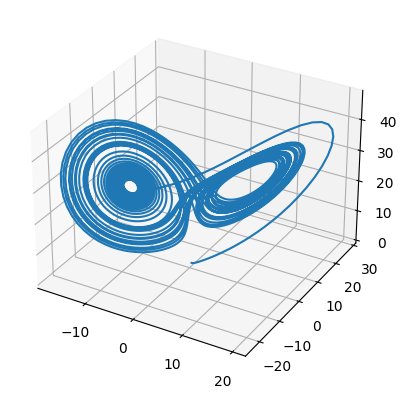

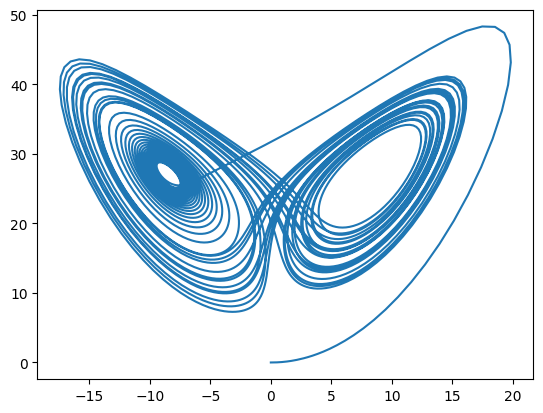

In [36]:
from typing import List
from mpl_toolkits.mplot3d import Axes3D

def rk4_lorenz(r0:[float],te:float,step:float,sigma:float=10,rho:float=28,beta:float=8/3):
    t=[]
    tm=0
    while tm<te:
        t.append(tm)
        tm+=step
        
    n=len(t)
    
    x=t.copy()
    y=t.copy()
    z=t.copy()
    x[0]=r0[0]
    y[0]=r0[1]
    z[0]=r0[2]
    
    for i in range(0,n-1):
        c1_x=step*(sigma*(y[i]-x[i]))
        c1_y=step*(x[i]*(rho-z[i])-y[i])
        c1_z=step*(x[i]*y[i]-beta*z[i])
        c2_x=step*(sigma*(y[i]+c1_y/2-(x[i]+c1_x/2)))
        c2_y=step*((x[i]+c1_x/2)*(rho-(z[i]+c1_z/2))-(y[i]+c1_y/2))
        c2_z=step*((x[i]+c1_x/2)*(y[i]+c1_y/2)-beta*(z[i]+c1_z/2))
        c3_x=step*(sigma*(y[i]+c2_y/2-(x[i]+c2_x/2)))
        c3_y=step*((x[i]+c2_x/2)*(rho-(z[i]+c2_z/2))-(y[i]+c2_y/2))
        c3_z=step*((x[i]+c2_x/2)*(y[i]+c2_y/2)-beta*(z[i]+c2_z/2))
        c4_x=step*(sigma*(y[i]+c3_y-(x[i]+c3_x)))
        c4_y=step*((x[i]+c3_x)*(rho-(z[i]+c3_z))-(y[i]+c3_y/2))
        c4_z=step*((x[i]+c3_x)*(y[i]+c3_y)-beta*(z[i]+c3_z))
        
        x[i+1]=x[i]+1/6*(c1_x+2*c2_x+2*c3_x+c4_x)
        y[i+1]=y[i]+1/6*(c1_y+2*c2_y+2*c3_y+c4_y)
        z[i+1]=z[i]+1/6*(c1_z+2*c2_z+2*c3_z+c4_z)
        
    return x,y,z,t

x,y,z,t=rk4_lorenz([0,1,0],40,0.01)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)

fig, ax = plt.subplots(1, 1)
ax.plot(x,z)

